In [1]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import nltk
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset = load_dataset('sentiment140',trust_remote_code=True)

print(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query'],
        num_rows: 1600000
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query'],
        num_rows: 498
    })
})


In [3]:
# pip install nltk

In [4]:
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)


In [5]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [6]:
train_data.shape , '  ' ,test_data.shape

((1600000, 5), '  ', (498, 5))

In [7]:
train_data.columns , test_data.columns

(Index(['text', 'date', 'user', 'sentiment', 'query'], dtype='object'),
 Index(['text', 'date', 'user', 'sentiment', 'query'], dtype='object'))

In [8]:
train_data['sentiment'].value_counts()


,count
sentiment,
0,800000
4,800000


In [9]:
train_data['sentiment'] = train_data['sentiment'].replace({0: 'negative' , 2: 'neutral',4: 'positive'})
test_data['sentiment'] = test_data['sentiment'].replace({0: 'negative', 2: 'neutral', 4: 'positive'})


In [10]:
train_data['sentiment'].value_counts()

,count
sentiment,
negative,800000
positive,800000


In [11]:
test_data['sentiment'].value_counts()


,count
sentiment,
positive,182
negative,177
neutral,139


In [12]:
train_data.isnull().sum()

,0
text,0
date,0
user,0
sentiment,0
query,0


In [13]:
test_data.isnull().sum()

,0
text,0
date,0
user,0
sentiment,0
query,0


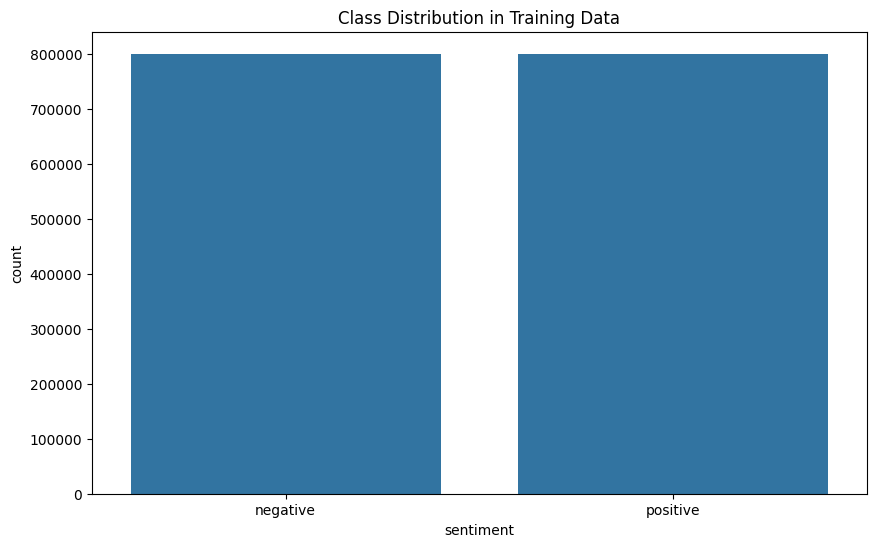

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=train_data)
plt.title('Class Distribution in Training Data')
plt.show()

### <font color='blue'>As the training dataset is balance so there is no need to do Oversampling , Undersamplaing or else

In [15]:
test_data = test_data[test_data['sentiment'] != 'neutral']


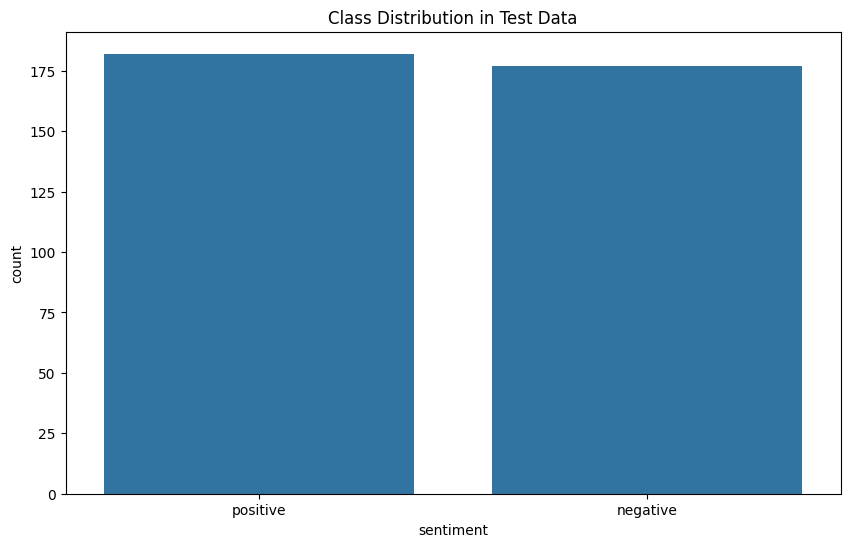

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=test_data)
plt.title('Class Distribution in Test Data')
plt.show()

<ipython-input-17-b9bc84ff5966>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df, palette='Blues_r')


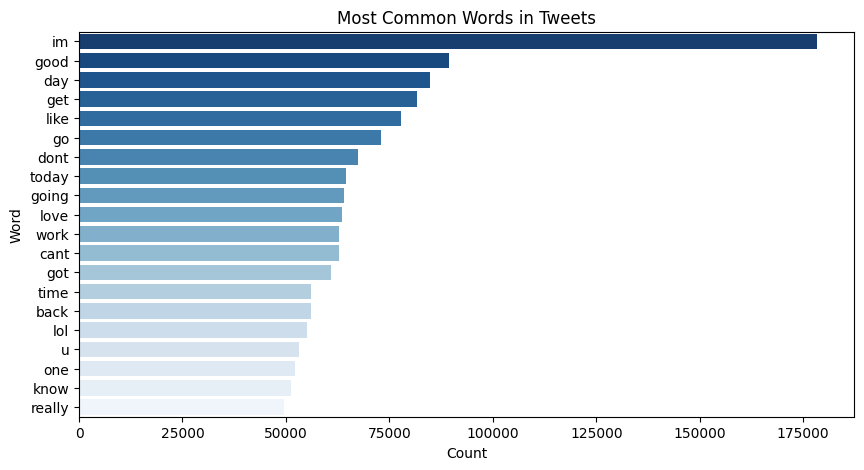

In [17]:
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words


train_data['tokenized_text'] = train_data['text'].map(preprocess_text)

word_list = [word for words in train_data['tokenized_text'] for word in words]

word_freq = Counter(word_list).most_common(20)

word_df = pd.DataFrame(word_freq, columns=['Word', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Word', data=word_df, palette='Blues_r')
plt.title('Most Common Words in Tweets')
plt.show()


In [ ]:
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

In [18]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    words = text.split()

    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)

    return filtered_words

train_data['tokenized_text'] = train_data['text'].map(preprocess_text)

word_list = []
for words in train_data['tokenized_text']:
    for word in words:
        word_list.append(word)

word_freq = Counter(word_list).most_common(20)

word_df = pd.DataFrame(word_freq, columns=['Word', 'Count'])


In [19]:
train_data.columns

Index(['text', 'date', 'user', 'sentiment', 'query', 'tokenized_text'], dtype='object')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_data['cleaned_text'] = train_data['tokenized_text'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_text'])

X_train_tfidf.shape

(1600000, 5000)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)

X_train_count = count_vectorizer.fit_transform(train_data['cleaned_text'])

X_train_count.shape

(1600000, 5000)

In [22]:
# Use preprocessed text
X = train_data['cleaned_text']
y = train_data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [23]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [24]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7735
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.75      0.77    159494
    positive       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [26]:
import joblib

joblib.dump(model, "logistic_regression_model.pkl")

joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")



['tfidf_vectorizer.pkl']

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train_tfidf, y_train)

In [ ]:
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train_tfidf, y_train)

In [ ]:
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

### <font color='green'> How does each architecture handle CNN & LSTM sequential text data?

CNN:
It handle sequential text data by applying filters over word embeddings to capture local patterns also use pooling to reduce dimensionality.

LSTM :
It process text sequentially(one word at a time)and use internal memory gates to keep important information over long sequences.

### <font color='green'> Which one would you choose for short tweets vs long text reviews, and why?

- for short tweet we can use 'CNN' model they do not need to store something for long time we can say less memory use where in the `LSTM` use for large sequence data so that it can connect with relation the old .